In [1]:
from glob import glob
from pyuvdata import UVData
import matplotlib.pyplot as plt
import os
import numpy as np

For repeating the HERA-19 analysis with the new `hera_pspec` capability, it would be highly desirable to get the correct antenna positions into the miriad files.  Basically this is necessary for imaging and for correctly constructing the wedge.  Probably it could be worked around if absolutely necessary.

In [2]:
import hsa7458_v001 

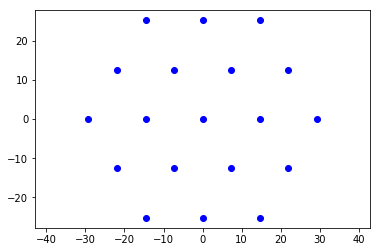

In [3]:
for ant in hsa7458_v001.prms['antpos_ideal']:
    x = hsa7458_v001.prms['antpos_ideal'][ant]['top_x']
    y = hsa7458_v001.prms['antpos_ideal'][ant]['top_y']
    if x == -1:
        continue
    plt.plot(x,y,'bo')
plt.axis('equal')
plt.show()

In [4]:
#os.system('add_uvws.py -C '+calfile+' filename')

In [88]:
f_uvc = 'zen.2457548.43140.xx.HH.uvc'#'zen.2457548.43140.xx.HH.uvc'
f_uvcU = 'zen.2457548.43140.xx.HH.uvcU'

In [46]:
import aipy
uv = aipy.miriad.UV(f_uvc)

In [65]:
aa = aipy.cal.get_aa('hsa7458_v001',np.array([0.15]))

In [76]:
antpos_ideal = aa.antpos_ideal

In [77]:
antpos_ideal.shape

(128, 3)

In [84]:
antpos_flatten = (antpos_ideal.T).flatten()

In [85]:
antpos_check = np.reshape(antpos_flatten,[3,128]).T

In [86]:
print antpos_ideal.shape
print antpos_check.shape
print (antpos_ideal-antpos_check).max()

(128, 3)
(128, 3)
0.0


In [87]:
print (antpos_ideal-antpos_check)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

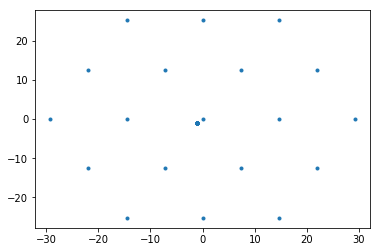

In [79]:
plt.plot(antpos_ideal[:,0],antpos_ideal[:,1],'.')

In [55]:
aipy.cal.get_aa?

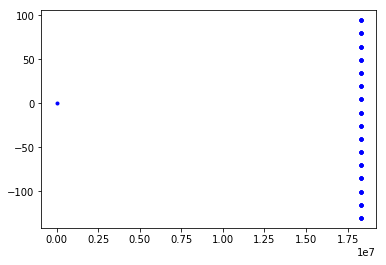

In [53]:
miriad_antpos = np.reshape(uv['antpos'],[3,113]).T
plt.plot(miriad_antpos[:,0],miriad_antpos[:,1],'b.')

In [37]:
print uv.items()
print uv.vars()

['vartable', 'obstype', 'history']
['latitud', 'npol', 'nspect', 'obsdec', 'vsource', 'ischan', 'operator', 'nants', 'baseline', 'sfreq', 'inttime', 'source', 'epoch', 'version', 'ra', 'restfreq', 'nschan', 'sdf', 'corr', 'freq', 'longitu', 'nchan', 'tscale', 'telescop', 'pol', 'coord', 'veldop', 'lst', 'time', 'dec', 'obsra']


In [38]:
uv['nants']

128

In [89]:
uvd_uvc = UVData()
uvd_uvc.read_miriad(f_uvc)
uvd_uvcU = UVData()
uvd_uvcU.read_miriad(f_uvcU)

antenna number 20 has visibilities associated with it, but it has a position of (0,0,0)


In [90]:
print set(uvd_uvc.ant_1_array)
print set(uvd_uvcU.ant_1_array)

set([64, 65, 112, 97, 72, 9, 10, 43, 96, 80, 81, 20, 53, 22, 105, 88, 89, 104, 31])
set([64, 65, 112, 97, 72, 9, 10, 43, 96, 80, 81, 20, 53, 22, 105, 88, 89, 104, 31])


(-8.313604611552387,
 16.262301842814736,
 -11.382265221770309,
 41.48112821250505)

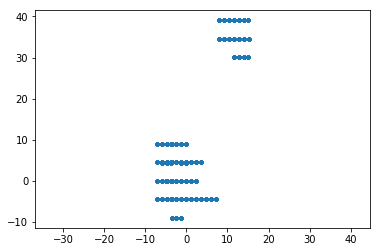

In [91]:
plt.plot(uvd_uvc.uvw_array[:,0],uvd_uvc.uvw_array[:,1],'.')
plt.axis('equal')

(-63.510000000000005,
 48.910000000000004,
 -55.633471938000014,
 55.633471938000014)

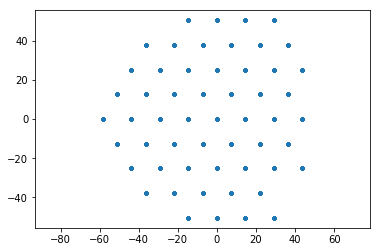

In [92]:
plt.plot(uvd_uvcU.uvw_array[:,0],uvd_uvcU.uvw_array[:,1],'.')
plt.axis('equal')

In [98]:
uvc_enu= uvd_uvc.get_ENU_antpos()[0]
print uvc_enu.shape
uvcU_enu= uvd_uvcU.get_ENU_antpos()[0]
print uvcU_enu.shape

(113, 3)
(128, 3)


(-37.899927426207135, 5.086143935872919, -2.2639093507954566, 7.56917875090899)

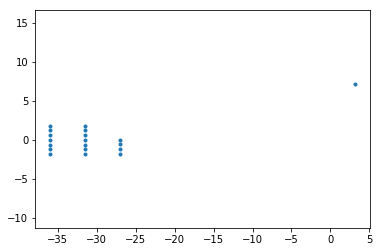

In [101]:
valid = np.unique(uvd_uvc.ant_1_array)
plt.plot(uvc_enu[valid,0],uvc_enu[valid,1],'.')
plt.axis('equal')

(-8.039455191941022, 8.639040107960302, -4.508425319901761, 5.330172239607313)

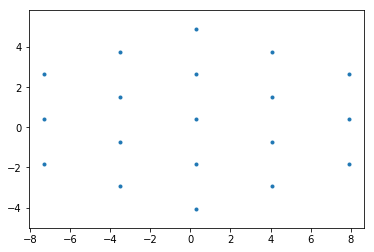

In [102]:
valid = np.unique(uvd_uvcU.ant_1_array)
plt.plot(uvcU_enu[valid,0],uvcU_enu[valid,1],'.')
plt.axis('equal')

In [104]:
from astropy import units as u
from astropy import constants as c
print (14.6*u.m/c.c).to(u.ns)
print 14.6*u.m

<Quantity 48.7003579 ns>

In [27]:
uvd_uvcU.write_uvfits(f_uvcU+'.uvfits',force_phase=True)

The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.


ValueError: Required attribute _antenna_positions for uvfits not defined. Define or set spoof_nonessential to True to spoof this attribute.

In [8]:
ants = set(uvd.ant_1_array)
print len(ants)
print ants

19
set([64, 65, 112, 97, 72, 9, 10, 43, 96, 80, 81, 20, 53, 22, 105, 88, 89, 104, 31])


In [12]:
print uvd.antenna_positions

None


In [9]:
plt.plot(uvd.antenna_positions[:,0],uvd.antenna_positions[:,1],'bo')
plt.axis('equal')

TypeError: 'NoneType' object has no attribute '__getitem__'

In [13]:
enu_antpos = uvd.get_ENU_antpos()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

(-39.31716629215153, 34.84816012070531, -2.2639093507954566, 7.56917875090899)

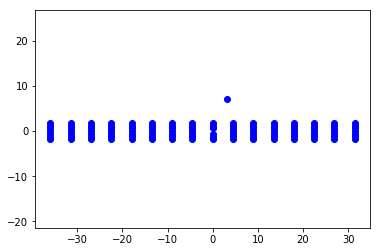

In [18]:
valid = set(uvd_uvc.ant_1_array)
plt.plot(enu_antpos[0][valid,0],enu_antpos[0][valid,1],'bo')
plt.axis('equal')

(-8.313604611552387,
 16.262301842814736,
 -11.382265221770309,
 41.48112821250505)

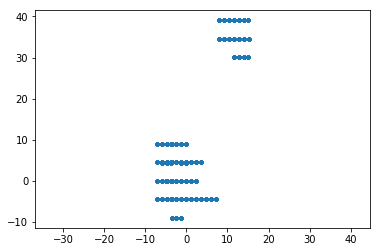

In [28]:
plt.plot(uvd_uvc.uvw_array[:,0],uvd_uvc.uvw_array[:,1],'.')
plt.axis('equal')

(-63.510000000000005,
 48.910000000000004,
 -55.633471938000014,
 55.633471938000014)

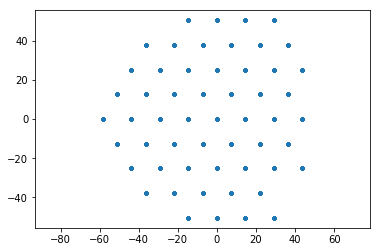

In [18]:
plt.plot(uvd.uvw_array[:,0],uvd.uvw_array[:,1],'.')
plt.axis('equal')

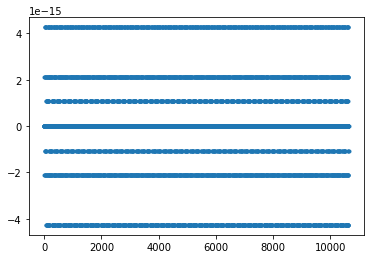

In [19]:
plt.plot(uvd.uvw_array[:,2],'.')